<a href="https://colab.research.google.com/github/seungkyeong/colab/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

과제) 네이버 뉴스에서 본인이 선택한 검색어로 검색 한 결과를 json으로 저장 한 후    
1) 적절하지 않은 단어를 제거 한 후   
2) 단어 빈도수 기준으로 histogram 생성  
3) word cloud 생성.   

아래 code를 변형 하여 사용.   
가능 하면 본인의 client id와 client secret 사용 할 것. 2주차 과제에 업로드 된 code확인


In [3]:
import os
import sys
import urllib.request
import datetime
import time
import json

client_id = 'rTZP43f3TQYJPjU7XaaL'
client_secret = '5Dc8ErU5rP'



#[CODE 1]
def getRequestUrl(url):    
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

#[CODE 2]
def getNaverSearch(node, srcText, start, display):    
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)
    
    url = base + node + parameters    
    responseDecode = getRequestUrl(url)   #[CODE 1]
    
    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def getPostData(post, jsonResult, cnt):    
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']
    
    pDate = datetime.datetime.strptime(post['pubDate'],  '%a, %d %b %Y %H:%M:%S +0900')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')
    
    jsonResult.append({'cnt':cnt, 'title':title, 'description': description, 
'org_link':org_link,   'link': org_link,   'pDate':pDate})
    return    

#[CODE 0]
def main():
    node = 'news'   # 크롤링 할 대상
    srcText = input('검색어를 입력하세요: ')
    cnt = 0
    jsonResult = []

    jsonResponse = getNaverSearch(node, srcText, 1, 100)  #[CODE 2]
    total = jsonResponse['total']
 
    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):         
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post, jsonResult, cnt)  #[CODE 3]       
        
        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100)  #[CODE 2]
       
    print('전체 검색 : %d 건' %total)
    
    with open('%s_naver_%s.json' % (srcText, node), 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)
                        
        outfile.write(jsonFile)
        
    print("가져온 데이터 : %d 건" %(cnt))
    print ('%s_naver_%s.json SAVED' % (srcText, node))
    
if __name__ == '__main__':
    main()


검색어를 입력하세요: AWS
[2022-12-10 05:36:03.546099] Url Request Success
[2022-12-10 05:36:04.739904] Url Request Success
[2022-12-10 05:36:05.947455] Url Request Success
[2022-12-10 05:36:07.153680] Url Request Success
[2022-12-10 05:36:08.385850] Url Request Success
[2022-12-10 05:36:09.625843] Url Request Success
[2022-12-10 05:36:10.831000] Url Request Success
[2022-12-10 05:36:12.048952] Url Request Success
[2022-12-10 05:36:13.284765] Url Request Success
[2022-12-10 05:36:14.487509] Url Request Success
HTTP Error 400: Bad Request
[2022-12-10 05:36:15.401522] Error for URL : https://openapi.naver.com/v1/search/news.json?query=AWS&start=1001&display=100
전체 검색 : 61743 건
가져온 데이터 : 1000 건
AWS_naver_news.json SAVED


In [4]:
#  폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
#런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
#  폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [2]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 264 kB in 11s (24.0 kB/s)
Reading

In [3]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


# 8장. 텍스트빈도분석 - 2) 한글 단어 분석 

## 한글 단어 분석을 위한 패키지 준비

In [4]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

# 1. 데이터 준비

### 1-1. 파일 읽기

In [5]:
inputFileName = '/content/AWS_naver_news'
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data #출력하여 내용 확인

[{'cnt': 1,
  'description': '현재 클라우드 시장은 <b>AWS</b>, MS애저 등이 주도하고 있으며, IBM‧구글‧알리바바 같은 기업이 추격하고 있다. 해외 클라우드 사업자들의 국내 시장 진출이 가속화되고 있는 가운데, KT‧네이버‧SK C&amp;C 등 국내 기업들과의... ',
  'link': 'http://www.industrynews.co.kr/news/articleView.html?idxno=48060',
  'org_link': 'http://www.industrynews.co.kr/news/articleView.html?idxno=48060',
  'pDate': '2022-12-10 09:08:00',
  'title': '스마트공장 3만개 시대 도래, 2023년 스마트제조혁신 &apos;고도화&apos; 원년 될까'},
 {'cnt': 2,
  'description': '안랩은 이번 &apos;안랩 클라우드&apos; 제공 사업으로 핀다가 도입한 <b>AWS</b> 운영에 있어 금융 컴플라이언스 준수 목표를... 안랩은 계정별 안정적인 통신을 지원하는 &apos;<b>AWS</b> 트랜짓 게이트웨이&apos;를 활용하고, 반드시 필요한 네트워크에... ',
  'link': 'https://it.chosun.com/site/data/html_dir/2022/12/09/2022120900881.html',
  'org_link': 'https://it.chosun.com/site/data/html_dir/2022/12/09/2022120900881.html',
  'pDate': '2022-12-10 06:02:00',
  'title': '[이주의 보안] 넥스원소프트, 이노코어 흡수합병…빅데이터 보안 사업 경쟁력...'},
 {'cnt': 3,
  'description': '더존비즈온의 Amaranth 10을 메가존클라우드 인프라와 패키지 형태로 구성해 구글 클라우드와 아마존웹서비스(<b>AWS</b>), 마이크

### 1-2. 분석할 데이터 추출

In [6]:
message = ''

for item in data:
#    if 'message' in item.keys(): 
#        message = message + re.sub(r'[^\w]', ' ', item['message']) +''
    if 'description' in item.keys(): 
        message = message + re.sub(r'[^\w]', ' ', item['description']) +''
        
message #출력하여 내용 확인

'현재 클라우드 시장은  b AWS  b   MS애저 등이 주도하고 있으며  IBM 구글 알리바바 같은 기업이 추격하고 있다  해외 클라우드 사업자들의 국내 시장 진출이 가속화되고 있는 가운데  KT 네이버 SK C amp C 등 국내 기업들과의    안랩은 이번  apos 안랩 클라우드 apos  제공 사업으로 핀다가 도입한  b AWS  b  운영에 있어 금융 컴플라이언스 준수 목표를    안랩은 계정별 안정적인 통신을 지원하는  apos  b AWS  b  트랜짓 게이트웨이 apos 를 활용하고  반드시 필요한 네트워크에    더존비즈온의 Amaranth 10을 메가존클라우드 인프라와 패키지 형태로 구성해 구글 클라우드와 아마존웹서비스  b AWS  b    마이크로소프트 MS  애저 등 주요 퍼블릭 클라우드 환경에서 강력한 협업 시너지를 발휘할 예정이다     아마존웹서비스  b AWS  b  가 기업이 산업 전반에 걸쳐 기본 데이터를 공유하거나 공개하지 않고도 결합한 데이터 세트를 쉽고 안전하게 분석하고 협업할 수 있게 하는 새로운 분석 서비스  apos  b AWS  b  클린룸  b AWS  b  Clean Rooms  apos 을 발표했다     더존비즈온의 Amaranth 10을 메가존클라우드 인프라와 패키지 형태로 구성해 구글 클라우드와 아마존웹서비스  b AWS  b    마이크로소프트 MS  애저 등 주요 퍼블릭 클라우드 환경에서 강력한 협업 시너지를 발휘할    더존비즈온의 Amaranth 10을 메가존클라우드 인프라와 패키지 형태로 구성해 구글 클라우드와 아마존웹서비스  b AWS  b    마이크로소프트 MS  애저 등 주요 퍼블릭 클라우드 환경에서 강력한 협업 시너지를 발휘할 예정이다     더존비즈온의 Amaranth 10을 메가존클라우드 인프라와 패키지 형태로 구성해 구글 클라우드와 아마존웹서비스  b AWS  b    마이크로소프트 MS  애저 등 주요 퍼블릭 클라우드 환경에서 강력한 협업 시너지를 발휘할    아마존웹서비스 

### 1-3. 품사 태깅 : 명사 추출

In [7]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N   #출력하여 내용 확인

['현재',
 '클라우드',
 '시장',
 '애저',
 '등',
 '구글',
 '알리바바',
 '기업',
 '추격',
 '해외',
 '클라우드',
 '사업자',
 '국내',
 '시장',
 '진출',
 '가속',
 '가운데',
 '네이버',
 '등',
 '국내',
 '기업',
 '안랩',
 '이번',
 '안랩',
 '클라우드',
 '제공',
 '사업',
 '도입',
 '운영',
 '금융',
 '컴플라이언스',
 '준수',
 '목표',
 '안랩',
 '계정',
 '별',
 '안정',
 '통신',
 '지원',
 '트랜짓',
 '게이트웨이',
 '를',
 '활용',
 '반드시',
 '네트워크',
 '더존',
 '비즈',
 '온',
 '메',
 '존',
 '클라우드',
 '인프라',
 '패키지',
 '형태',
 '구성',
 '구글',
 '클라우드',
 '아마존',
 '웹서비스',
 '마이크로소프트',
 '애저',
 '등',
 '주요',
 '퍼블릭',
 '클라우드',
 '환경',
 '협업',
 '시너지',
 '발휘',
 '예정',
 '아마존',
 '웹서비스',
 '기업',
 '산업',
 '전반',
 '기본',
 '데이터',
 '공유',
 '거나',
 '공개',
 '결합',
 '데이터',
 '세트',
 '분석',
 '협업',
 '수',
 '분석',
 '서비스',
 '클린룸',
 '발표',
 '더존',
 '비즈',
 '온',
 '메',
 '존',
 '클라우드',
 '인프라',
 '패키지',
 '형태',
 '구성',
 '구글',
 '클라우드',
 '아마존',
 '웹서비스',
 '마이크로소프트',
 '애저',
 '등',
 '주요',
 '퍼블릭',
 '클라우드',
 '환경',
 '협업',
 '시너지',
 '발휘',
 '더존',
 '비즈',
 '온',
 '메',
 '존',
 '클라우드',
 '인프라',
 '패키지',
 '형태',
 '구성',
 '구글',
 '클라우드',
 '아마존',
 '웹서비스',
 '마이크로소프트',
 '애저',
 '등',
 '주요',
 '퍼블릭',
 '클라우드

## 2. 데이터 탐색

### 2-1. 단어 빈도 탐색

In [8]:
count = Counter(message_N)

count   #출력하여 내용 확인

Counter({'현재': 42,
         '클라우드': 762,
         '시장': 73,
         '애저': 91,
         '등': 385,
         '구글': 211,
         '알리바바': 12,
         '기업': 280,
         '추격': 1,
         '해외': 27,
         '사업자': 37,
         '국내': 92,
         '진출': 10,
         '가속': 3,
         '가운데': 66,
         '네이버': 56,
         '안랩': 59,
         '이번': 76,
         '제공': 120,
         '사업': 83,
         '도입': 72,
         '운영': 89,
         '금융': 71,
         '컴플라이언스': 11,
         '준수': 12,
         '목표': 11,
         '계정': 43,
         '별': 34,
         '안정': 32,
         '통신': 33,
         '지원': 78,
         '트랜짓': 21,
         '게이트웨이': 22,
         '를': 195,
         '활용': 81,
         '반드시': 20,
         '네트워크': 17,
         '더존': 24,
         '비즈': 24,
         '온': 31,
         '메': 64,
         '존': 73,
         '인프라': 84,
         '패키지': 16,
         '형태': 19,
         '구성': 38,
         '아마존': 703,
         '웹서비스': 504,
         '마이크로소프트': 185,
         '주요': 66,
         '퍼블릭': 37,
 

In [9]:
word_count = dict()

#for tag, counts in count.most_common(80):
for tag, counts in count.most_common(70):  
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

클라우드 : 762
아마존 : 703
웹서비스 : 504
서비스 : 389
기업 : 280
데이터 : 280
벤트 : 233
구글 : 211
마이크로소프트 : 185
미국 : 174
기술 : 161
디지털 : 153
라스베이거스 : 148
현지 : 136
분야 : 135
글로벌 : 134
시간 : 128
제공 : 120
개발 : 116
플랫폼 : 110
기반 : 106
행사 : 104
관리 : 104
고객 : 102
한국 : 102
전문가 : 101
국내 : 92
애저 : 91
운영 : 89
발표 : 87
환경 : 86
보안 : 86
혁신 : 85
파트너 : 85
인프라 : 84
사업 : 83
활용 : 81
지원 : 78
빅데이터 : 77
이번 : 76
솔루션 : 75
시장 : 73
분석 : 73
도입 : 72
통해 : 72
금융 : 71
티어 : 71
그룹 : 69
가운데 : 66
주요 : 66
대표 : 64
선도 : 63
연사 : 63
협력 : 62
시스템 : 61
지난 : 61
전환 : 61


In [10]:
print(word_count)

{'클라우드': 762, '아마존': 703, '웹서비스': 504, '서비스': 389, '기업': 280, '데이터': 280, '벤트': 233, '구글': 211, '마이크로소프트': 185, '미국': 174, '기술': 161, '디지털': 153, '라스베이거스': 148, '현지': 136, '분야': 135, '글로벌': 134, '시간': 128, '제공': 120, '개발': 116, '플랫폼': 110, '기반': 106, '행사': 104, '관리': 104, '고객': 102, '한국': 102, '전문가': 101, '국내': 92, '애저': 91, '운영': 89, '발표': 87, '환경': 86, '보안': 86, '혁신': 85, '파트너': 85, '인프라': 84, '사업': 83, '활용': 81, '지원': 78, '빅데이터': 77, '이번': 76, '솔루션': 75, '시장': 73, '분석': 73, '도입': 72, '통해': 72, '금융': 71, '티어': 71, '그룹': 69, '가운데': 66, '주요': 66, '대표': 64, '선도': 63, '연사': 63, '협력': 62, '시스템': 61, '지난': 61, '전환': 61}


In [17]:
del word_count['이번']
del word_count['라스베이거스']


In [18]:
print(word_count)

{'클라우드': 762, '아마존': 703, '서비스': 389, '기업': 280, '데이터': 280, '벤트': 233, '구글': 211, '마이크로소프트': 185, '미국': 174, '기술': 161, '디지털': 153, '현지': 136, '분야': 135, '글로벌': 134, '시간': 128, '제공': 120, '개발': 116, '플랫폼': 110, '기반': 106, '행사': 104, '관리': 104, '고객': 102, '전문가': 101, '국내': 92, '애저': 91, '운영': 89, '발표': 87, '환경': 86, '보안': 86, '혁신': 85, '파트너': 85, '인프라': 84, '사업': 83, '활용': 81, '지원': 78, '빅데이터': 77, '솔루션': 75, '시장': 73, '분석': 73, '도입': 72, '통해': 72, '금융': 71, '티어': 71, '그룹': 69, '가운데': 66, '주요': 66, '대표': 64, '선도': 63, '연사': 63, '협력': 62, '시스템': 61, '지난': 61, '전환': 61}


### 히스토그램

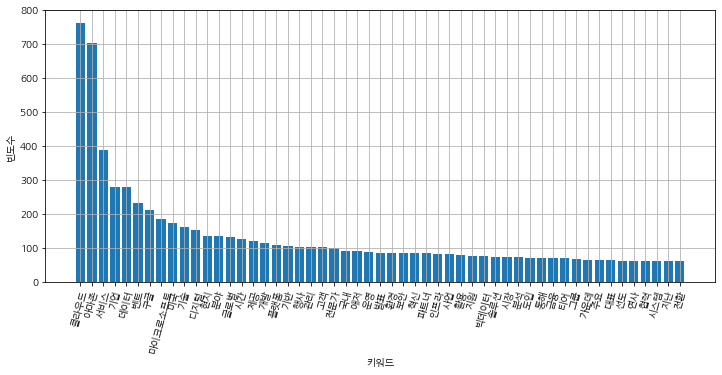

In [19]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

### 워드클라우드

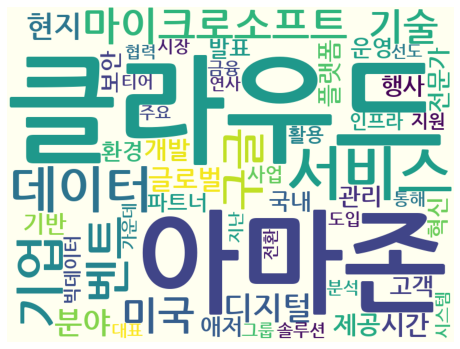

In [20]:
wc = WordCloud(path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [21]:
cloud.to_file(inputFileName + '_cloud.jpg')